In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
dataset=pd.read_csv('prepared.csv')

In [4]:
dataset.head()

,Unnamed: 0,iyear,imonth,iday,country_txt,city,attacktype1_txt,targtype1_txt,corp1,target1,natlty1_txt,gname,weaptype1_txt,weapsubtype1_txt,weapdetail,nkill,nwound,propextent_txt,ransomamt
0,0,2012,1,1,56,4206,0,2,4764,1084,63,0,2,6,5788,3.0,14.0,1,15860.45
1,1,2012,1,1,82,11535,2,9,2201,9799,96,4,2,10,1604,4.0,3.0,1,15860.45
2,2,2012,1,1,56,4206,0,2,7297,1084,63,0,2,6,1604,2.0,14.0,1,15860.45
3,3,2012,1,1,0,5999,2,9,5528,10957,53,2,2,24,1604,0.0,0.0,2,15860.45
4,4,2012,1,1,27,10956,3,13,5547,2402,30,4,5,0,1604,18.0,5.0,1,15860.45


In [5]:
y_target=dataset['gname']

In [6]:
x_data=dataset.drop('gname',axis=1)

In [7]:
for feature in x_data:
    abs_data=abs(x_data)
    x_data=abs_data

# first feature selection method

In [8]:
'''first method is chi2 square method'''

'first method is chi2 square method'

In [9]:
from sklearn.feature_selection import chi2

In [10]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_data,y_target)

In [11]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_data.columns)

In [12]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [13]:
featureScores

,Specs,Score
0,Unnamed: 0,5.270126e+07
1,iyear,5.953210e+00
2,imonth,1.886016e+02
3,iday,3.907414e+01
4,country_txt,4.103597e+05
5,city,1.428024e+06
6,attacktype1_txt,1.705753e+03
7,targtype1_txt,9.305346e+02
8,corp1,5.593455e+06
9,target1,7.909613e+05


In [14]:
print(featureScores.nlargest(11,'Score'))  #print 10 best features

               Specs         Score
17         ransomamt  8.109461e+08
0         Unnamed: 0  5.270126e+07
8              corp1  5.593455e+06
5               city  1.428024e+06
9            target1  7.909613e+05
4        country_txt  4.103597e+05
10       natlty1_txt  3.716672e+05
13        weapdetail  2.850508e+05
14             nkill  4.435045e+04
15            nwound  1.818919e+04
12  weapsubtype1_txt  3.954335e+03


# Second method 

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_data,y_target)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

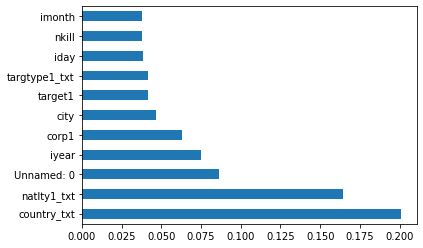

In [16]:
feat_importances = pd.Series(model.feature_importances_, index=x_data.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [17]:
#x_data.head()

In [18]:
#dataset.head()